### Sistemas Multiagente.

### Máster Universitario en Ingeniería del Software e Inteligencia Artificial.

### Curso 2021/22

2ª Convocatoria ordinaria

Nombre: José Garbán


# Sistema Multiagente para la simulación del tráfico aéreo

Características del modelo:

El modelo fue elaborado en MESA (Python), que es el lenguaje más conocido por el autor. Se utilizó un Jupyter Notebook para guardar los resultados de forma que se puedan ver los estados paso a paso. Está basado en un ejemplo del mismo paquete MESA llamado "boid_flockers", un simulador del movimiento de enjambres de aves que evitan chocar entre sí.

En "boid.py" se encuentran los modelos de los aviones (subclase del modelo de las aves en el ejemplo "boid_flockers") y de los aeropuertos. El código está disponible en: https://github.com/josegarban/mesa-airport.

In [4]:
from model import AirplaneFlockers
import paths
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Definición de los aeropuertos. Cada tupla (x,y) es un aeropuerto. Los recorridos se forman más adelante con pares de tuplas
AIRPORTS = ((20, 20), (30, 30), (10, 15), (10, 20), (80, 15), (80, 80), (50, 60), (40, 25))

In [6]:
# Definición de las rutas para llegar de un aeropuerto a otro en línea recta
worldmap, route_solutions = paths.main(AIRPORTS, width=100, height=100)

In [7]:
# Mostrar las rutas
for p in route_solutions: print(p)

[(20, 20), (20, 21), (20, 22), (20, 23), (20, 24), (20, 25), (20, 26), (20, 27), (20, 28), (21, 28), (22, 28), (23, 28), (24, 28), (25, 28), (26, 28), (27, 28), (28, 28), (29, 28), (30, 28), (30, 29), (30, 30)]
[(10, 15), (10, 16), (10, 17), (10, 18), (10, 19), (10, 20)]
[(80, 15), (80, 16), (80, 17), (80, 18), (80, 19), (80, 20), (80, 21), (80, 22), (80, 23), (80, 24), (80, 25), (80, 26), (80, 27), (80, 28), (80, 29), (80, 30), (80, 31), (80, 32), (80, 33), (80, 34), (80, 35), (80, 36), (80, 37), (80, 38), (80, 39), (80, 40), (80, 41), (80, 42), (80, 43), (80, 44), (80, 45), (80, 46), (80, 47), (80, 48), (80, 49), (80, 50), (80, 51), (80, 52), (80, 53), (80, 54), (80, 55), (80, 56), (80, 57), (80, 58), (80, 59), (80, 60), (80, 61), (80, 62), (80, 63), (80, 64), (80, 65), (80, 66), (80, 67), (80, 68), (80, 69), (80, 70), (80, 71), (80, 72), (80, 73), (80, 74), (80, 75), (80, 76), (80, 77), (80, 78), (80, 79), (80, 80)]
[(50, 60), (50, 59), (50, 58), (49, 58), (49, 57), (49, 56), (49, 5

In [8]:
# Función para dibujar los mapas

def draw_boids(model):
    airport_x , airport_y   = [], []
    airplane_x, airplane_y = [], []
    
    airplanes = [x for x in model.schedule.agents if x.type == "airplane"]
    airports  = [x for x in model.schedule.agents if x.type == "airport" ]

    for a in airports:
        x, y = a.pos
        airport_x.append(x)
        airport_y.append(y)                    
    for a in airplanes:
        x, y = a.pos
        airplane_x.append(x)
        airplane_y.append(y)
    
    fig = plt.figure(figsize=(10,10))

    ax = fig.add_subplot(111)
    ax.scatter(airplane_x, airplane_y, marker="2")
    ax.scatter(airport_x, airport_y, alpha=0.5, edgecolors='black')

    for (x,y) in zip(airplane_x, airplane_y):
        label = "  ✈{:.0f}".format(airplane_x.index(x)) + "({0}, {1})".format(x,y)
        plt.annotate(label, (x,y))

    plt.xlim([0, 100])
    plt.ylim([0, 100])


In [9]:
# Llamada al modelo AirplaneFlockers en model.py. 

model = AirplaneFlockers(population=0, 
                         width=100, height=100, 
                         routes=route_solutions)

[20 20]
[10 15]
[80 15]
[50 60]


Plane 2 at position 0 ([80 15]) in direction 1
Plane 1 at position 0 ([10 15]) in direction 1
Plane 3 at position 0 ([50 60]) in direction 1
Plane 0 at position 0 ([20 20]) in direction 1
0
Step: 20
Plane 2 at position 1 ([80 16]) in direction 1
Plane 0 at position 1 ([20 21]) in direction 1
Plane 3 at position 1 ([50 59]) in direction 1
Plane 1 at position 1 ([10 16]) in direction 1
1
Plane 0 at position 2 ([20 22]) in direction 1
Plane 3 at position 2 ([50 58]) in direction 1
Plane 2 at position 2 ([80 17]) in direction 1
Plane 1 at position 2 ([10 17]) in direction 1
2
Plane 0 at position 3 ([20 23]) in direction 1
Plane 3 at position 3 ([49 58]) in direction 1
Plane 2 at position 3 ([80 18]) in direction 1
Plane 1 at position 3 ([10 18]) in direction 1
3
Plane 2 at position 4 ([80 19]) in direction 1
Plane 1 at position 4 ([10 19]) in direction 1
Plane 0 at position 4 ([20 24]) in direction 1
Plane 3 at position 4 ([49 57]) in direction 1
4
Plane 1 at position 5 ([10 20]) in direct

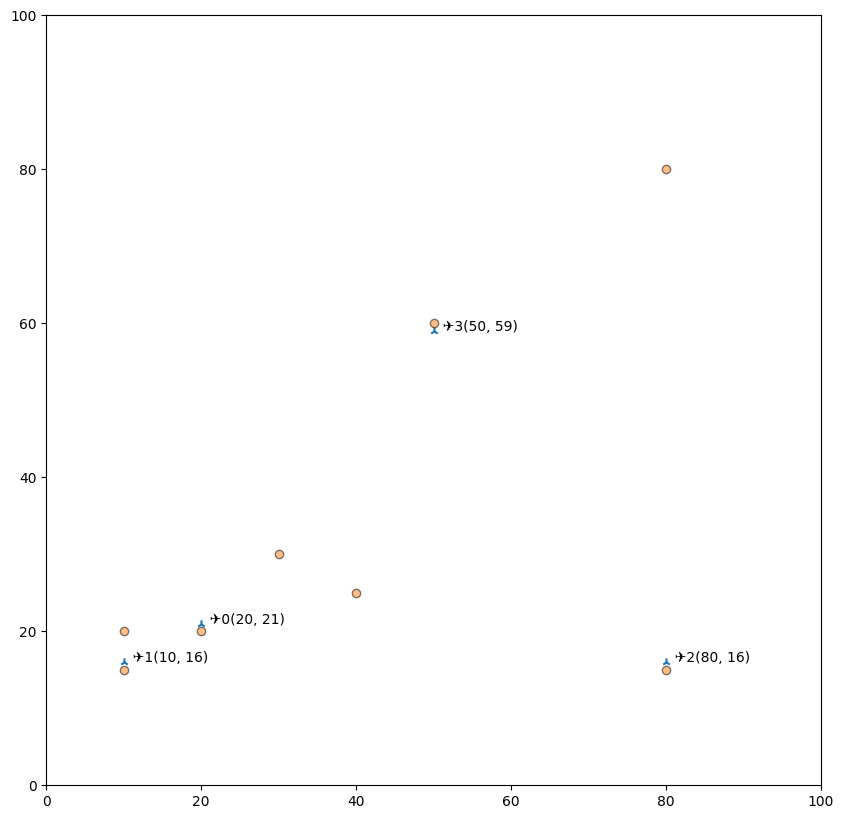

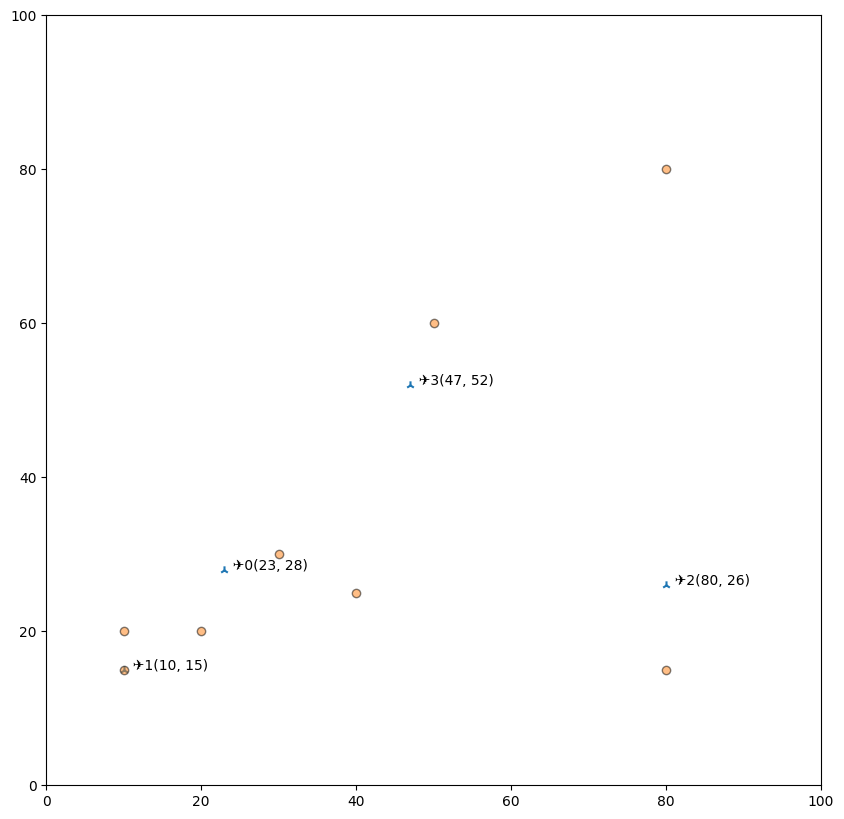

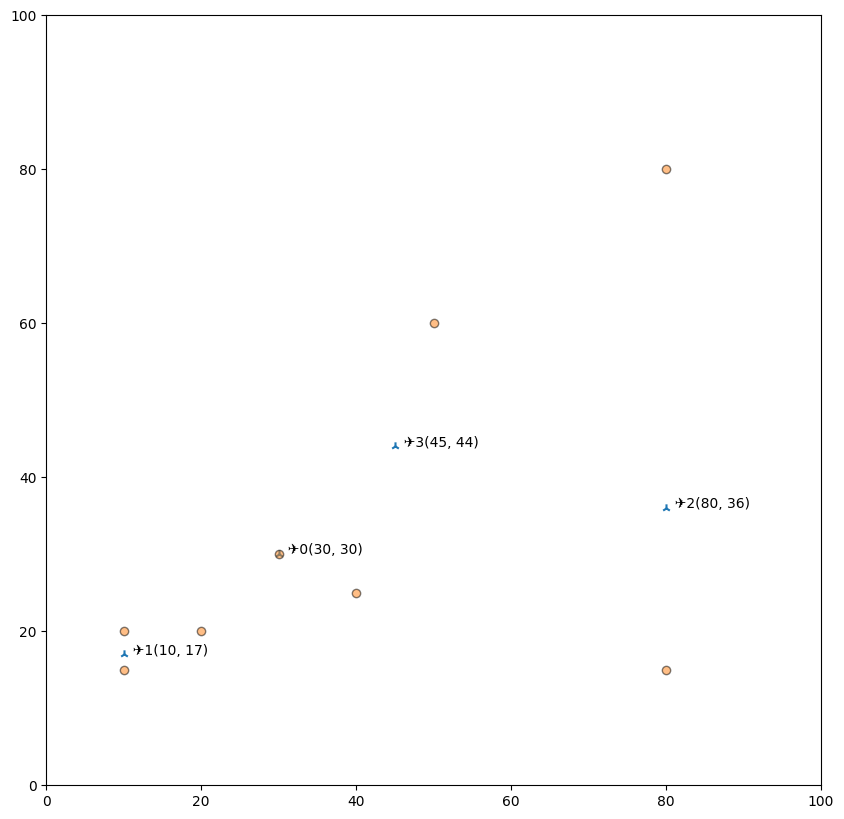

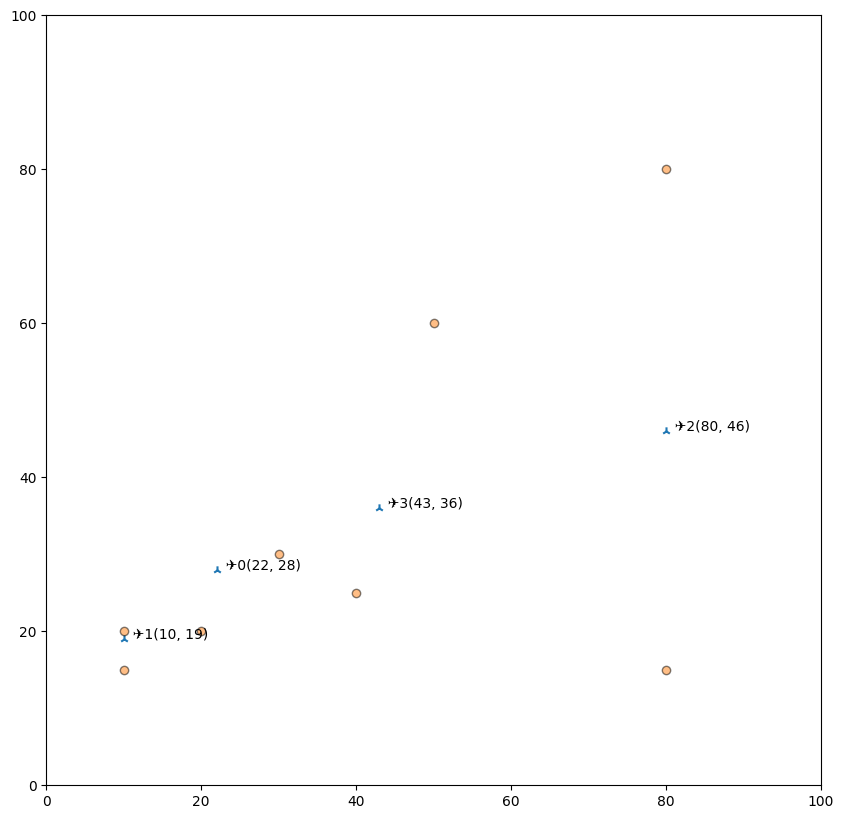

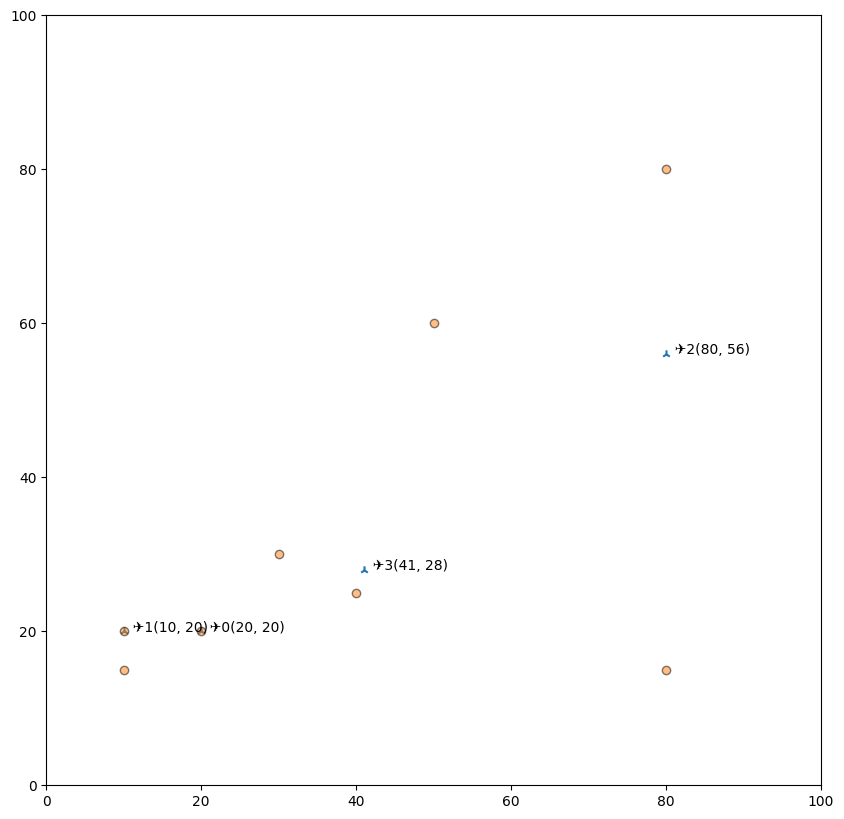

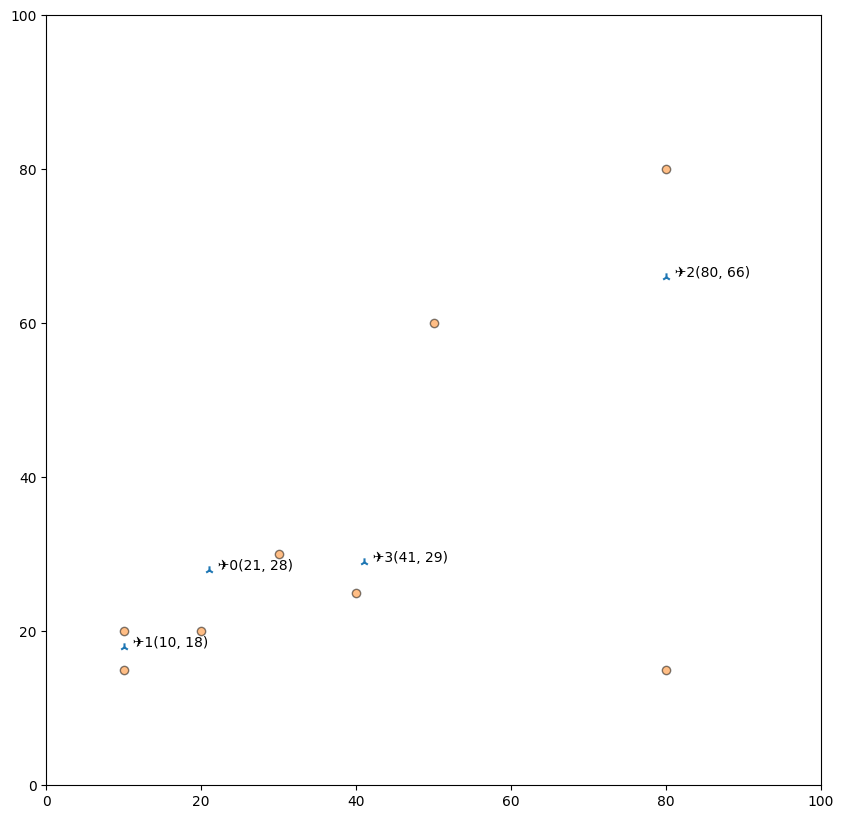

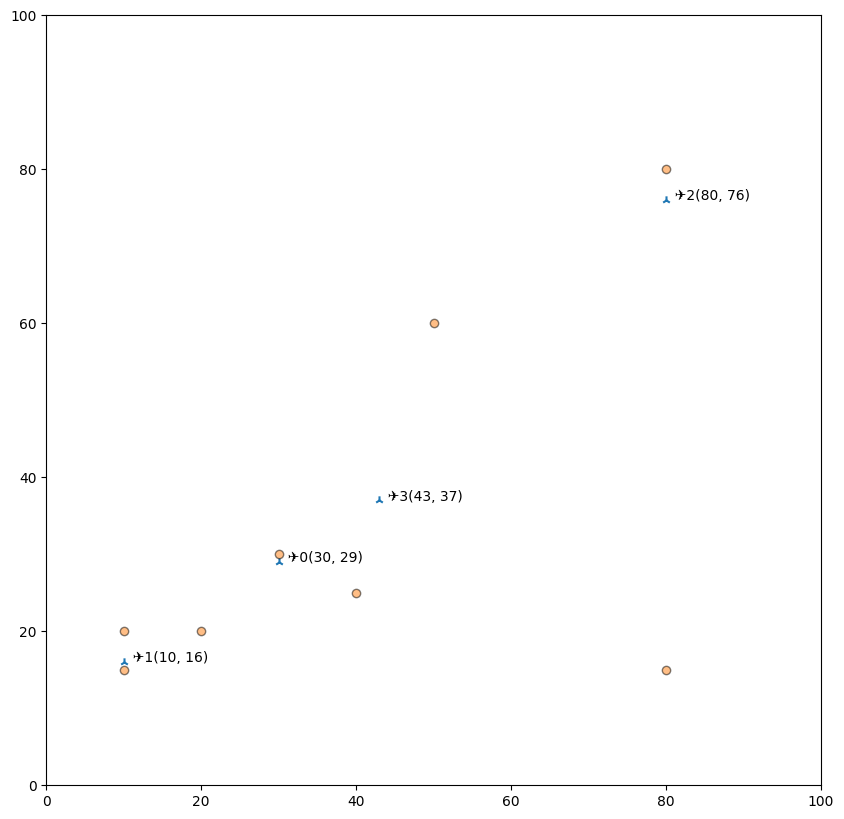

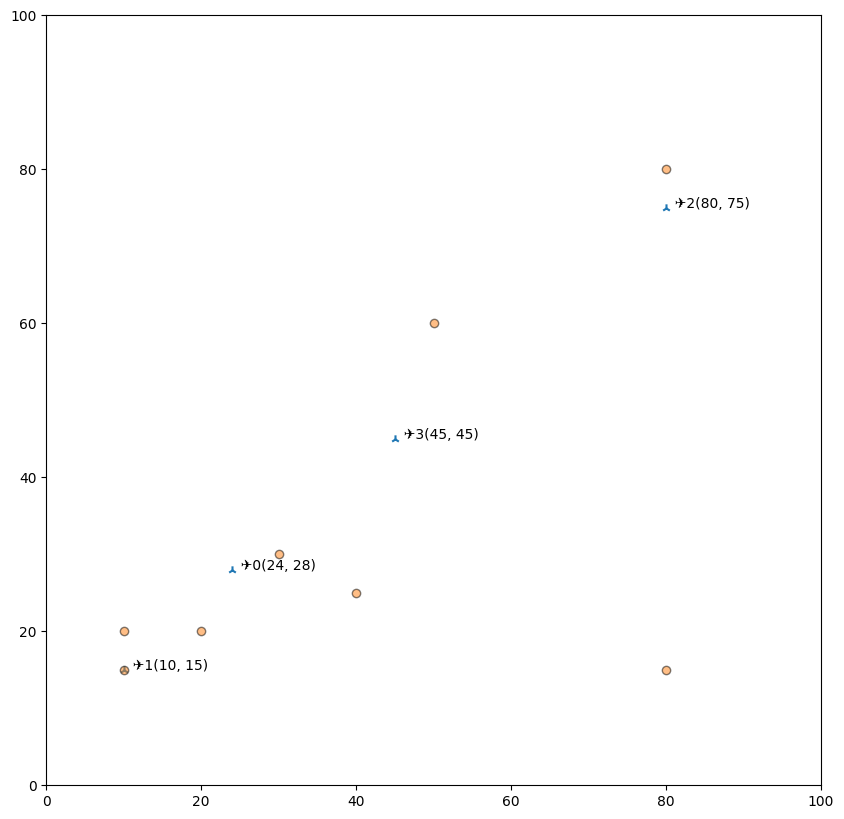

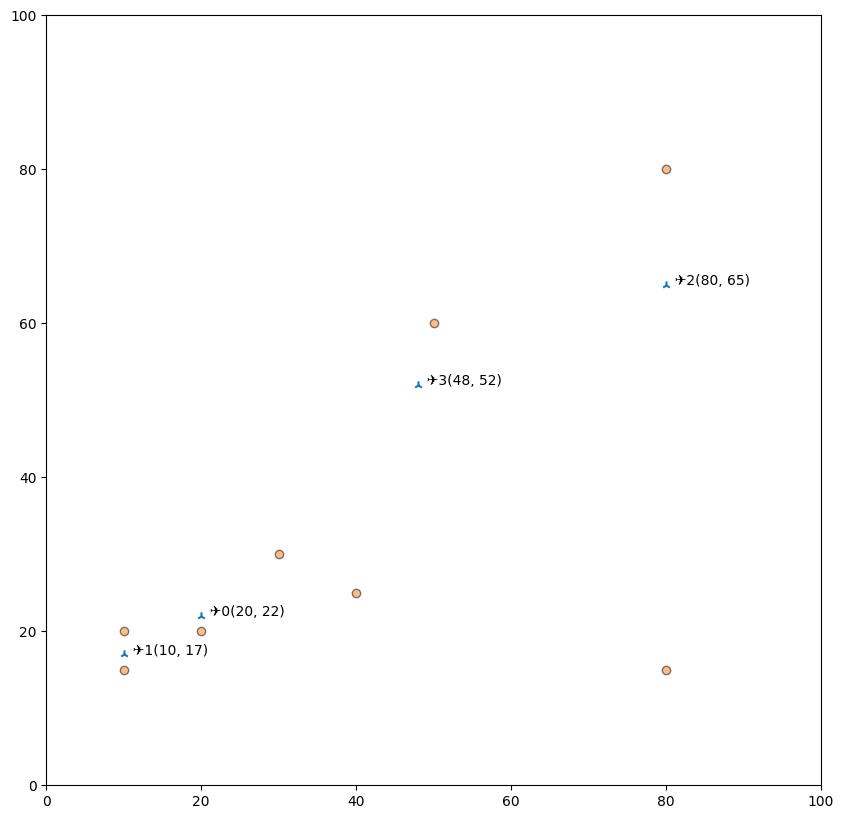

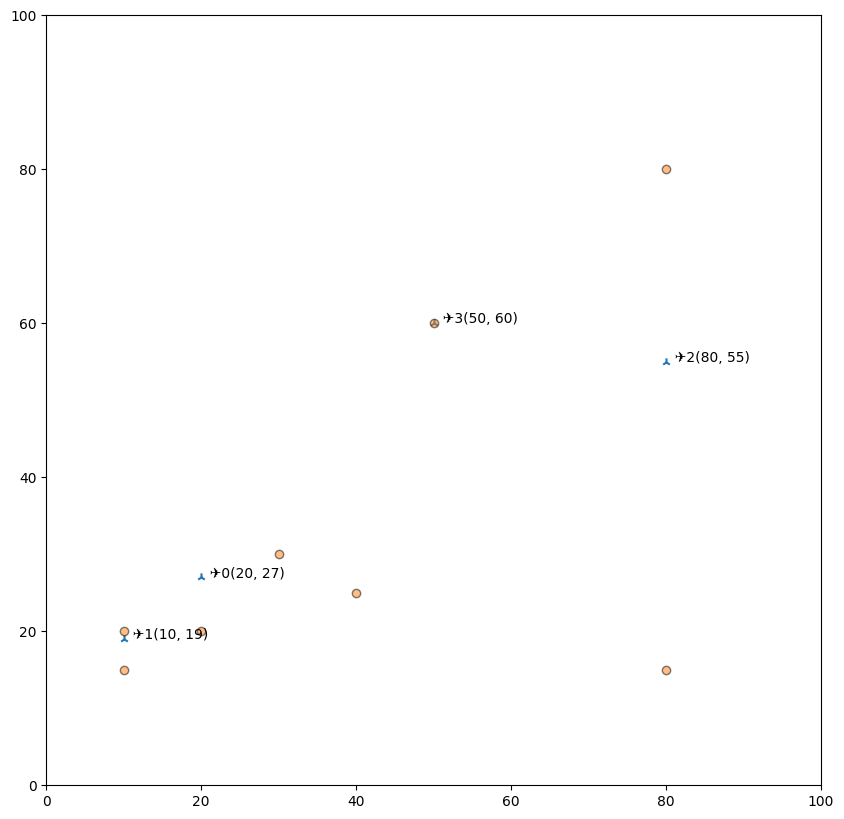

In [10]:
"""
Mostrar el movimiento de los aviones (algunos pasos). Los aviones son los triángulos azules, y los aeropuertos son los círculos rojos.
Por medio de las gráficas puede verse que los aviones van y vuelven entre dos aeropuertos.
"""

for i in list(range(200)):
    model.step()
    if i%10 == 0:
        print("Step:", 20)
        draw_boids(model)